**Sathappan_Alagappan_Assignment2**

In [1]:
# Github Link: 

In [2]:
#IMPORT REQUIRED PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**1)	Load in the appropriate csv file as a pandas dataframe (batting.csv)**

In [3]:
df = pd.read_csv('batting.csv')

# creating a Table for names
df_names = df.copy().loc[:, ('playerID','nameFirst','nameLast')].drop_duplicates('playerID')
df_names.columns = ['playerID', 'First_Name', 'Last_Name']

**2)	Print out the dimensions and info about the dataframe you just created**

In [8]:
print (df.shape)
print (df.info())

(102816, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 n

**3)	How many players have hit 40 or more HRs in one single season? (Number only)**

In [9]:
answer3 = df.copy()[['playerID','yearID', 'HR']].groupby(['playerID', 'yearID']).sum().reset_index().where(df.copy()[['playerID','yearID', 'HR']].groupby(['playerID', 'yearID']).sum().reset_index()['HR'] >= 40).dropna()['playerID'].nunique()

answer3

142

**4)	How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRs)**

In [10]:
q4df = df.copy()[['playerID','HR']].groupby('playerID').sum().reset_index()
answer4 = q4df[q4df['HR'] >= 600].merge(df_names, on = 'playerID')[['First_Name', 'Last_Name', 'HR']].sort_values('HR', ascending = 0).reset_index(drop=True)

answer4

,First_Name,Last_Name,HR
0,Barry,Bonds,762
1,Hank,Aaron,755
2,Babe,Ruth,714
3,Alex,Rodriguez,696
4,Willie,Mays,660
5,Ken,Griffey,630
6,Jim,Thome,612
7,Sammy,Sosa,609


**5)	How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)**

In [11]:
q5df = df.copy().groupby(['playerID', 'yearID']).sum().reset_index()
answer5 = q5df[(q5df['2B'] >= 40) & (q5df['3B'] >= 10) & (q5df['H'] >= 200) & (q5df['HR'] >= 30)]['playerID'].nunique()

answer5

11

**6)	How many players seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )**

In [12]:
q6df = df.copy().groupby(['playerID', 'yearID']).sum().reset_index()
answer6 = q6df[q6df['SB'] >= 100][['playerID', 'yearID', 'SB']].merge(df_names, on = 'playerID')[['First_Name', 'Last_Name','yearID', 'SB']].sort_values('SB', ascending = 0).reset_index(drop = True)

answer6

,First_Name,Last_Name,yearID,SB
0,Hugh,Nicol,1887,138.0
1,Rickey,Henderson,1982,130.0
2,Arlie,Latham,1887,129.0
3,Lou,Brock,1974,118.0
4,Charlie,Comiskey,1887,117.0
5,Billy,Hamilton,1889,111.0
6,John,Ward,1887,111.0
7,Billy,Hamilton,1891,111.0
8,Vince,Coleman,1985,110.0
9,Vince,Coleman,1987,109.0


**7)	How many players in the 1960s (yearID) have hit 200 or more HRs? (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)**

In [13]:
sixties = list(range(1960, 1970))
q7df = df.copy()[df.copy()['yearID'].isin(sixties)][['playerID', 'HR']].groupby('playerID').sum().reset_index().where(df.copy()[df.copy()['yearID'].isin(sixties)][['playerID', 'HR']].groupby('playerID').sum().reset_index()['HR']>=200).dropna().sort_values('HR', ascending = 0)
answer7 = q7df.merge(df_names, on = 'playerID')[['First_Name', 'Last_Name', 'HR']]
answer7.columns = ['First_Name', 'Last_Name', 'Number_of_HRs']

answer7

,First_Name,Last_Name,Number_of_HRs
0,Harmon,Killebrew,393.0
1,Hank,Aaron,375.0
2,Willie,Mays,350.0
3,Frank,Robinson,316.0
4,Willie,McCovey,300.0
5,Frank,Howard,288.0
6,Norm,Cash,278.0
7,Ernie,Banks,269.0
8,Mickey,Mantle,256.0
9,Orlando,Cepeda,254.0


**8)	Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)**

In [14]:
q8df = df.copy().loc[:, ('playerID', 'HR')].groupby('playerID').sum().reset_index().sort_values('HR', ascending = 0)
q8df = q8df[q8df['HR'] > q8df['HR'].nlargest(2).iloc[-1]]
answer8 = q8df.merge(df_names, on = 'playerID')[['First_Name', 'Last_Name', 'HR']]
answer8.columns = ['First_Name', 'Last_Name', 'HRs']

answer8

,First_Name,Last_Name,HRs
0,Barry,Bonds,762


**9)	Who had the most hits (H) in the 1970s? (Dataframe)**

In [15]:
seventies = list(range(1970, 1980))
q9df = df.copy()[df.copy()['yearID'].isin(seventies)][['playerID', 'H']].groupby('playerID').sum().reset_index()
answer9 = q9df[q9df['H'] > q9df['H'].nlargest(2).iloc[-1]].merge(df_names, on = 'playerID')[['First_Name', 'Last_Name', 'H']]
answer9.columns = ['First_Name', 'Last_Name', 'Hits']

answer9

,First_Name,Last_Name,Hits
0,Pete,Rose,2045


**10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe, first name, last name, OBP, ordered descending by OBP)**

In [16]:
q10df = df.copy()[df.copy()['yearID']==1977].groupby('playerID').sum().reset_index()
q10df['PA'] = q10df['AB'] + q10df['BB'] + q10df['HBP'] + q10df['SH']+ q10df['SF']
q10df = q10df[q10df['PA'] >= 500]
q10df['OBP'] = (q10df['H'] + q10df['BB'] + q10df['HBP']) / (q10df['AB'] + q10df['BB'] +  q10df['HBP'] + q10df['SF'])
answer10 = q10df[q10df['OBP'] > q10df['OBP'].nlargest(6).iloc[-1]][['playerID', 'OBP']].merge(df_names, on = 'playerID')[['First_Name', 'Last_Name', 'OBP']].sort_values('OBP', ascending = 0).reset_index(drop = True)

answer10

,First_Name,Last_Name,OBP
0,Rod,Carew,0.448773
1,Ken,Singleton,0.437788
2,Reggie,Smith,0.426910
3,Mike,Hargrove,0.420312
4,Joe,Morgan,0.417054


**11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)**

In [17]:
q11df = df.copy()[df.copy()['yearID']==2013].groupby('playerID').sum().reset_index()
q11df['PA'] = q11df['AB'] + q11df['BB'] + q11df['HBP'] + q11df['SH']+ q11df['SF']
q11df = q11df[q11df['PA'] >= 300]
q11df['Average'] = q11df['H'] / q11df['AB']
answer11 = q11df[q11df['Average'] > q11df['Average'].nlargest(9).iloc[-1]][['playerID', 'Average']].merge(df_names, on = 'playerID')[['First_Name', 'Last_Name', 'Average']].sort_values('Average', ascending = 0).reset_index(drop = True)

answer11

,First_Name,Last_Name,Average
0,Miguel,Cabrera,0.347748
1,Hanley,Ramirez,0.345395
2,Michael,Cuddyer,0.331288
3,Joe,Mauer,0.323596
4,Mike,Trout,0.322581
5,Chris,Johnson,0.321012
6,Freddie,Freeman,0.319419
7,Yasiel,Puig,0.319372


**12)	Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)**

In [18]:
forties = list(range(1940, 1950))
leaders = 5  # defining number of  hit leaders to be displayed in 'answer12'
q12df = df.copy()[['playerID','yearID','H']][df.copy()['yearID'].isin(forties)]
q12df = q12df[['playerID', 'H']].groupby('playerID').sum().reset_index()
answer12 = q12df[q12df['H'] >= q12df['H'].nlargest(leaders).iloc[-1]].sort_values('H', ascending = 0).merge(df_names, on = 'playerID')[['First_Name', 'Last_Name', 'H']]
answer12.columns = ['First_Name', 'Last_Name', 'Hits']

answer12

,First_Name,Last_Name,Hits
0,Lou,Boudreau,1578
1,Bob,Elliott,1563
2,Dixie,Walker,1512
3,Stan,Musial,1432
4,Bobby,Doerr,1407


**13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)**

In [20]:
mlb = ['AL', 'NL']
q13df = df.copy()[['playerID','yearID','lgID','H']][df.copy()['lgID'].isin(mlb)][['playerID', 'yearID', 'H']]
year_leader = q13df.groupby(['yearID'])['H'].transform(max) == q13df['H']
mlb_career_hits = df.copy()[['playerID','yearID','lgID','H']][df.copy()['lgID'].isin(mlb)][['playerID', 'yearID', 'H']].groupby('playerID').sum().reset_index()
q13df = q13df[year_leader]
q13df = q13df.groupby('playerID').count().sort_values('H', ascending = 0).reset_index()[['playerID', 'yearID']]
q13df.columns = ['playerID', 'Hits_Leader']
answer13 = q13df[q13df['Hits_Leader'] == q13df['Hits_Leader'].nlargest(1).iloc[-1]].merge(mlb_career_hits, on = 'playerID').merge(df_names, on = 'playerID')[['First_Name', 'Last_Name', 'Hits_Leader', 'H']].sort_values('H', ascending = 0).reset_index(drop = True)
answer13.columns = ['First_Name', 'Last_Name', 'Hits_Leader', 'MLB_Career_Hits']

answer13

,First_Name,Last_Name,Hits_Leader,MLB_Career_Hits
0,Pete,Rose,7,4256
1,Ty,Cobb,7,4189
2,Ichiro,Suzuki,7,3030


**14) Which players have played the most games for their careers?  Top 5 first name, last name, descending by games played presented as a dataframe**

In [21]:
q14df = df.copy()[['playerID', 'G']].groupby('playerID').sum().reset_index().sort_values('G', ascending = 0)
answer14 = q14df[q14df['G'] >= q14df['G'].nlargest(5).iloc[-1]].merge(df_names, on = 'playerID')[['First_Name', 'Last_Name', 'G']]
answer14.columns = ['First_Name', 'Last_Name', 'Games_Played']

answer14

,First_Name,Last_Name,Games_Played
0,Pete,Rose,3562
1,Carl,Yastrzemski,3308
2,Hank,Aaron,3298
3,Rickey,Henderson,3081
4,Ty,Cobb,3035


**15)	How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here**

In [22]:
q15df = df.copy()[['playerID', 'H', 'HR']].groupby('playerID').sum().reset_index()
answer15 = q15df[(q15df['H'] >= 3000) & (q15df['HR'] >= 500)].merge(df_names, on = 'playerID').count()['playerID']
answer15

5

**16) How many HRs were hit during the entire 1988 season?  Just a number is okay here**

In [23]:
answer16 = df.copy()[['HR']][df.copy()['yearID'] == 1988].sum()['HR']                          

answer16

3180

**17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average**

In [24]:
f_name = 'Wade'
l_name = 'Boggs'
q17df = df.copy()[(df.copy()['nameFirst'] == f_name) & (df.copy()['nameLast'] == l_name)].groupby(['nameFirst','nameLast','yearID']).sum().reset_index()
q17df['Average'] = q17df['H'] / q17df['AB']
answer17 = q17df[q17df['Average'] >= q17df['Average'].nlargest(3).iloc[-1]][['nameFirst','nameLast','yearID', 'Average']].sort_values('Average', ascending = 0).reset_index(drop = True)
answer17.columns = ['First_Name', 'Last_Name', 'Season', 'Average']

answer17

,First_Name,Last_Name,Season,Average
0,Wade,Boggs,1985,0.367534
1,Wade,Boggs,1988,0.366438
2,Wade,Boggs,1987,0.362976


**18)	 Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  Dataframe with first name, last name, OBP**

In [25]:
year = 1995
pa_req = 400
obp_top = 10
q18df = df.copy()[df.copy()['yearID'] == year].groupby(['playerID', 'nameFirst', 'nameLast']).sum().reset_index().drop(['yearID', 'stint'], axis = 1)
q18df['PA'] = q18df['AB'] + q18df['BB'] + q18df['HBP'] + q18df['SH']+ q18df['SF']
q18df = q18df[q18df['PA'] >= pa_req]
q18df['OBP'] = (q18df['H'] + q18df['BB'] + q18df['HBP']) / (q18df['AB'] + q18df['BB'] +  q18df['HBP'] + q18df['SF'])
answer18 = q18df[q18df['OBP'] >= q18df['OBP'].nlargest(obp_top).iloc[-1]][['nameFirst', 'nameLast', 'OBP']].sort_values('OBP', ascending = 0).reset_index(drop = True)
answer18.columns = ['First_Name', 'Last_Name', 'OBP']

answer18

,First_Name,Last_Name,OBP
0,Edgar,Martinez,0.478873
1,Frank,Thomas,0.454405
2,Mark,McGwire,0.440758
3,Jim,Thome,0.438061
4,Barry,Bonds,0.431496
5,Tim,Salmon,0.429467
6,Chili,Davis,0.429119
7,Dave,Magadan,0.427553
8,Chuck,Knoblauch,0.424483
9,Tim,Naehring,0.414729


**19)	Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs**

In [26]:
years = [1922, 1925, 1926, 1928]
q19df = df.copy()[['playerID', 'nameFirst', 'nameLast','3B']][df.copy()['yearID'].isin(years)].groupby(['playerID', 'nameFirst', 'nameLast']).sum().reset_index()[['nameFirst', 'nameLast','3B']]
answer19 = q19df[q19df['3B'] == q19df['3B'].max()]
answer19.columns = ['First_Name', 'Last_Name', 'Number_Of_3Bs']
answer19 = answer19.reset_index(drop = True)

answer19

,First_Name,Last_Name,Number_Of_3Bs
0,Curt,Walker,59


**20)	How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here**

In [27]:
hr_req = 30
sb_req = 30
q20df = df.copy()[['playerID', 'yearID', 'HR', 'SB']].groupby(['playerID', 'yearID']).sum().reset_index()
answer20 = q20df[(q20df['HR'] >= hr_req) & (q20df['SB'] >= sb_req)]['playerID'].nunique()

answer20

38

**21) Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)**

In [28]:
year = 1986
ab_req = 400

q21df = df.copy()[df.copy()['yearID'] == year].drop(['birthYear', 'yearID', 'stint', 'lgID'], axis = 1).groupby(['playerID', 'nameFirst', 'nameLast']).sum().reset_index()
q21df = q21df[q21df['AB'] >= ab_req]
q21df['OBP'] = (q21df['H'] + q21df['BB'] + q21df['HBP']) / (q21df['AB'] + q21df['BB'] +  q21df['HBP'] + q21df['SF'])
answer21 = q21df[q21df['OBP'] == q21df['OBP'].max()].reset_index()[['nameFirst', 'nameLast', 'OBP']]
answer21.columns = ['First_Name', 'Last_Name', 'OBP']

answer21

,First_Name,Last_Name,OBP
0,Wade,Boggs,0.45283


**22)	Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)**

In [29]:
year = 1997
league = 'NL'
ab_req = 400

q22df = df.copy()[(df.copy()['yearID'] == year) & (df.copy()['lgID'] == league)].drop(['birthYear', 'yearID', 'stint', 'lgID'], axis = 1).groupby(['playerID', 'nameFirst', 'nameLast']).sum().reset_index()
q22df = q22df[q22df['AB'] >= ab_req]
q22df['OBP'] = (q22df['H'] + q22df['BB'] + q22df['HBP']) / (q22df['AB'] + q22df['BB'] +  q22df['HBP'] + q22df['SF'])
answer22 = q22df[q22df['OBP'] == q22df['OBP'].max()].reset_index()[['nameFirst', 'nameLast', 'OBP']]
answer22.columns = ['First_Name', 'Last_Name', 'OBP']

answer22

,First_Name,Last_Name,OBP
0,Larry,Walker,0.451807


**23)	Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)**

In [30]:
year = 2012
ab_req = 500

#professor informed in class (dt. 9/22) that league average should be aggregate (NL & AL together) average for 2012

q23df = df.copy()[['playerID', 'nameFirst', 'nameLast', 'AB', 'HR']][df.copy()['yearID'] == year].groupby(['playerID', 'nameFirst', 'nameLast']).sum().reset_index()
q23df = q23df[q23df['AB'] >= ab_req]
answer23 = q23df[q23df['HR'] > q23df['HR'].mean()].sort_values('HR', ascending = 0).reset_index()[['nameFirst', 'nameLast', 'HR']]
answer23.columns = ['First_Name', 'Last_Name', 'HR']

answer23

,First_Name,Last_Name,HR
0,Miguel,Cabrera,44
1,Josh,Hamilton,43
2,Curtis,Granderson,43
3,Edwin,Encarnacion,42
4,Ryan,Braun,41
5,Adam,Dunn,41
6,Adrian,Beltre,36
7,Josh,Willingham,35
8,Jay,Bruce,34
9,Adam,LaRoche,33


**24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)**

In [31]:
hr_req = 50
q24df = df.copy()[['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID', 'HR']].groupby(['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID']).sum().reset_index()
q24df = q24df[q24df['HR'] >= hr_req]
q24df['Age'] = q24df['yearID'] - q24df['birthYear']
answer24 = q24df[q24df['Age'] == q24df['Age'].min()][['nameFirst', 'nameLast', 'HR', 'yearID', 'Age']]
answer24.columns = ['First_Name', 'Last_Name', 'HRs', 'Season', 'Age']
answer24 = answer24.reset_index(drop = True)

answer24

,First_Name,Last_Name,HRs,Season,Age
0,Prince,Fielder,50,2007,23


**25)	Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs)**

In [36]:
hr_req = 300
q25df = df.copy()[['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID', 'HR']].groupby(['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID']).sum().groupby(level =[0]).cumsum().reset_index()
q25df = q25df[q25df['HR'] >= hr_req]
eclipsed300 = q25df.groupby(['playerID', 'nameFirst', 'nameLast', 'birthYear'])['yearID'].transform(min) == q25df['yearID']
q25df = q25df[eclipsed300].sort_values('yearID', ascending = 1)
q25df['Age'] = q25df['yearID'] - q25df['birthYear']
answer25 = q25df[q25df['Age'] <= q25df['Age'].nsmallest(5).iloc[-1]][['nameFirst', 'nameLast', 'yearID', 'Age']].reset_index(drop = True)
answer25.columns = ['First_Name', 'Last_Name', 'Season', 'Age']

answer25

,First_Name,Last_Name,Season,Age
0,Jimmie,Foxx,1935,28
1,Mel,Ott,1937,28
2,Alex,Rodriguez,2003,28
3,Andruw,Jones,2005,28
4,Albert,Pujols,2008,28


**BONUS Question 1: Graph total HRs per season using bar graph **

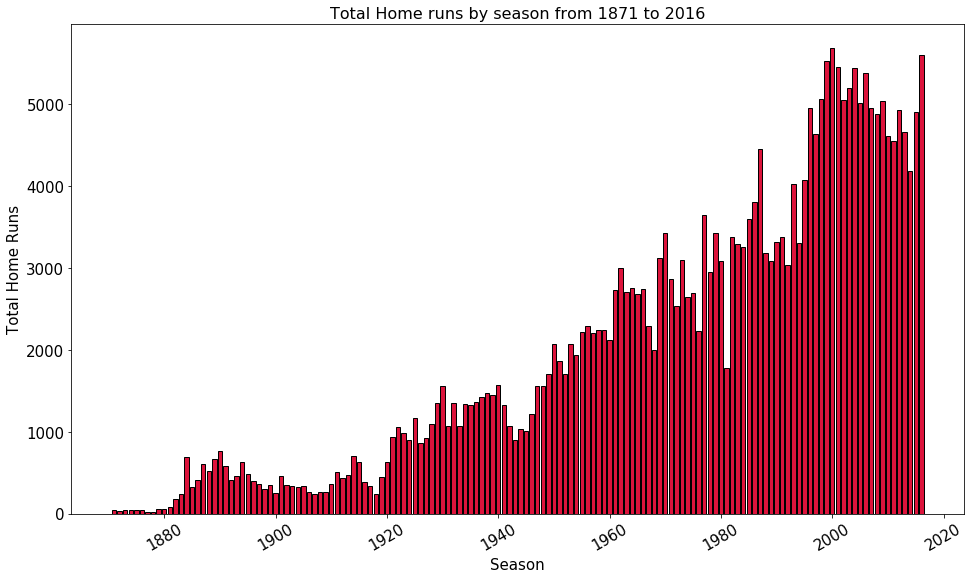

In [32]:
b1df = df.copy()[['yearID', 'HR']].groupby('yearID').sum().reset_index()
plt.figure(figsize=(16,9))
plt.bar(b1df['yearID'], b1df['HR'],color= 'crimson', edgecolor = 'black')
plt.xlabel('Season',fontsize=15)
plt.ylabel('Total Home Runs',fontsize=15)
plt.xticks(fontsize=15, rotation = 30)
plt.yticks(fontsize=15)
plt.title('Total Home runs by season from 1871 to 2016',fontsize=16)
plt.show()

**Using a line graph please graph the average HRs per AB (think about this) per season**

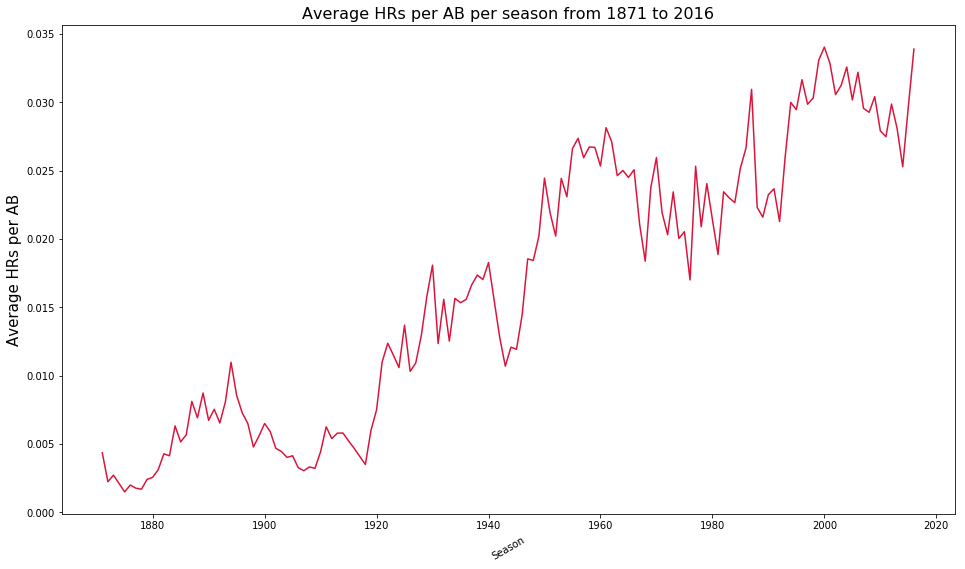

In [33]:
b2df = df.loc [ : , ('yearID', 'AB', 'HR')].copy().groupby('yearID').sum().reset_index()
b2df ['HR_per_AB'] = b2df ['HR'] / b2df ['AB']
plt.figure(figsize=(16,9))
plt.plot(b2df['yearID'],b2df['HR_per_AB'],color='crimson')
plt.xlabel('Season',fontsize=10, rotation = 30)
plt.ylabel('Average HRs per AB',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Average HRs per AB per season from 1871 to 2016',fontsize=16)
plt.show()

In [37]:
answers = [answer3, answer4, answer5, answer6, answer7, answer8, answer9, answer10, answer11, answer12, answer13, answer14, answer15, answer16, answer17, answer18, answer19, answer20, answer21, answer22, answer23, answer24, answer25, 'end']
head = ["answer3"," answer4"," answer5"," answer6"," answer7"," answer8"," answer9"," answer10"," answer11"," answer12"," answer13"," answer14"," answer15"," answer16"," answer17"," answer18"," answer19"," answer20"," answer21"," answer22"," answer23"," answer24"," answer25"]

a = 0
for i in head:
    print (i)
    print (answers[a])
    print ("")
    print ("*********")
    a = a+1

answer3
142

*********
 answer4
  First_Name  Last_Name   HR
0      Barry      Bonds  762
1       Hank      Aaron  755
2       Babe       Ruth  714
3       Alex  Rodriguez  696
4     Willie       Mays  660
5        Ken    Griffey  630
6        Jim      Thome  612
7      Sammy       Sosa  609

*********
 answer5
11

*********
 answer6
   First_Name  Last_Name  yearID     SB
0        Hugh      Nicol    1887  138.0
1      Rickey  Henderson    1982  130.0
2       Arlie     Latham    1887  129.0
3         Lou      Brock    1974  118.0
4     Charlie   Comiskey    1887  117.0
5       Billy   Hamilton    1889  111.0
6        John       Ward    1887  111.0
7       Billy   Hamilton    1891  111.0
8       Vince    Coleman    1985  110.0
9       Vince    Coleman    1987  109.0
10      Arlie     Latham    1888  109.0
11     Rickey  Henderson    1983  108.0
12      Vince    Coleman    1986  107.0
13        Tom      Brown    1891  106.0
14      Maury      Wills    1962  104.0
15       Pete   Browning